# Purpose

This notebook demonstrates the model experimentation and finalization. It covers EDA, outlier treatment, transformation, training, model evaluation and comparison across models.

## Imports

In [1]:
import os
import os.path as op
import shutil

# standard third party imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# impute missing values
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from category_encoders import TargetEncoder


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings

warnings.filterwarnings('ignore', message="pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.", 
                        category=FutureWarning)


/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/datashader/bundling.py:42: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def resample_segment(segments, new_segments, min_segment_length, max_segment_length, ndims):
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/datashader/bundling.py:75: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplie

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
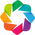

/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit 

In [4]:
# standard code-template imports
from ta_lib.core.api import (
    create_context, get_dataframe, get_feature_names_from_column_transformer, string_cleaning,
    get_package_path, display_as_tabs, save_pipeline, load_pipeline, initialize_environment,
    load_dataset, save_dataset, DEFAULT_ARTIFACTS_PATH
)

import ta_lib.eda.api as eda
from xgboost import XGBRegressor
from ta_lib.regression.api import SKLStatsmodelOLS
from ta_lib.regression.api import RegressionComparison, RegressionReport
import ta_lib.reports.api as reports
from ta_lib.data_processing.api import Outlier

initialize_environment(debug=False, hide_warnings=True)

# Initialization

In [5]:
artifacts_folder = DEFAULT_ARTIFACTS_PATH

In [7]:
%run /home/sathwika/housing-price-prediction/regression-py/regression-py/notebooks/housing_price/conf/config_param.ipynb

In [8]:
config_path = op.join('conf', 'config.yml')
context = create_context(config_path)

# 3 Feature Engineering

The focus here is the `Pipeline` and not the model. Though the model would inform the pipeline that is needed to train the model, our focus is to set it up in such a way that it can be saved/loaded, tweaked for different model choices and so on.

## 3.1 Read the Train and Test Data

In [9]:
train_X = load_dataset(context, 'train/housing/features')
train_y = load_dataset(context, 'train/housing/target')
print(train_X.shape, train_y.shape)

test_X = load_dataset(context, 'test/housing/features')
test_y = load_dataset(context, 'test/housing/target')
print(test_X.shape, test_y.shape)

(16512, 9) (16512, 1)
(4128, 9) (4128, 1)


## 3.2 Feature Engineering Pipelines


**Dev NOTES**

For Feature Engineering and Model Building sklearn.pipeline.Pipeline are leveraged because of the following advantages
<details>
    
1. It helps in automating workflows and are easier to read and comprehend.
2. Right Sequence can be ensured and (for example always encodes before imputing)
3. Reproducibility is very convenient with pipelines
4. Pipelines help you prevent data leakage in your test data
5. Code is near implementation ready

#### General Steps in the Feature Transformation are as follows
 - Outlier Treatment
 - Encoding of Categorical Columns
 - Missing Values Imputation

In [10]:
# collecting different types of columns for transformations
cat_columns = train_X.select_dtypes('object').columns
num_columns = train_X.select_dtypes('number').columns

In [11]:
cat_columns

Index(['ocean_proximity'], dtype='object')

#### Outlier Handling
- A Custom Transformer is used to handle outliers. It is not included as part of the pipeline as outliers handling are optional for test data
- An option to either drop or cap the outliers can be passed during the transform call
- If we want to treat outliers for some columns them we can pass cols argument to the Transformer
- This will go into production code

In [12]:
outlier_transformer = Outlier(method='mean')
print(train_X.shape)
train_X = outlier_transformer.fit_transform(train_X)
print(train_X.shape)

(16512, 9)
(16512, 9)


#### Encoding


Some sample pipelines showcasing how to create column specific pipelines and integrating them overall is presented below

- Commonly target encoding is done for categorical variables with too many levels.
- We also group sparse levels. For fewer levels one hot encoding/label encoding is preferred.
- If there is one dominant level, we can use binary encoding.
- This will go into production code

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([
        ('simple_impute', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#housing_num_tr = num_pipeline.fit_transform(num_columns)

from sklearn.compose import ColumnTransformer

num_attribs = list(num_columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

#train_X_prepared = full_pipeline.fit_transform(train_X)

**Dev notes(Encoding):**
<details>

    Some common practices followed in Categorical Feature Encoding are
    * For categorical variables with too many levels, target encoding can be done.
    * For fewer levels, one hot encoding can be done.
    * If one very dominant level is observed, binary encoding can be used.
    
    
</details>

## 3.2 Feature analysis

Using the pipeline above analyze the features and decide on additional features to add/remove from the pipeline. This section will not be part of the production code, unless input data drifts etc. are explicitly demanded in the project.

Here we are primarily focused on feature selection/elimination based on business rules, prior knowledge, data analysis.

**We are not building any models at this point.**


- we create some sample data to analyze that we assume represent the population
- train the features transformer and do the analysis as below

In [15]:
sample_X = train_X.sample(frac=0.1, random_state=context.random_seed)
sample_y = train_y.loc[sample_X.index]

sample_train_X = get_dataframe(
    full_pipeline.fit_transform(sample_X, sample_y), 
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
)

# nothing to do for target
sample_train_y = sample_y

In [16]:
sample_train_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.416091,1.015602,0.128101,-0.434729,0.628304,0.300176,0.637553,-1.697436,-0.725338,-0.461602,2.921852,0.0,0.0,0.0,1.0,0.0
1,0.779238,-0.850582,0.363356,0.417009,0.344262,0.363333,0.337367,-0.114238,-0.004739,-0.048930,-0.262157,1.0,0.0,0.0,0.0,0.0
2,1.209404,-1.371810,-0.185573,0.040879,0.701511,1.510312,0.905460,-1.010986,-0.532993,0.529586,1.170231,0.0,0.0,0.0,0.0,1.0
3,0.789127,-0.855236,0.284938,-0.155133,0.107073,-0.006588,0.146927,-0.088580,-0.309789,-0.307372,0.464968,1.0,0.0,0.0,0.0,0.0
4,-0.793092,1.480985,-0.656083,-0.268148,-0.449298,-0.718233,-0.556734,0.159076,0.289556,-0.493600,-0.571061,0.0,1.0,0.0,0.0,0.0


Running the features transformer on the complete data

In [17]:
train_X = get_dataframe(
    full_pipeline.fit_transform(train_X, train_y), 
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
)

### 3.2.1 Univariate


- Look at each variable independently. This is useful if your models have assumptions on the distribution and/or bounds on the features/target

In [18]:
out = eda.get_density_plots(train_X, cols=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'])
out

BokehModel(combine_events=True, render_bundle={'docs_json': {'a76afb5d-ee8b-4e9f-b724-0f1fac60eb1b': {'version…

In [19]:
# save the plots are html
reports.create_report({'univariate': out}, name='feature_analysis_univariate')

A report containing the above plot is available [here](https://drive.google.com/file/d/16ntqUc_zvpg0at5pTtO-ljBjw5UVGFnp/view?usp=sharing)


Alternatively, the above plots can be generated as a single html as below. The output from this is available [here](https://drive.google.com/file/d/1vUaCcs1PJ4IYo1em9-eZIEj9WuDsnFKT/view?usp=sharing)

In [20]:
reports.feature_analysis(train_X,'./feature_analysis_report.html')

p-value may not be accurate for N > 5000.


### 3.2.2 Bivariate - mutual interactions

- Find columns with high correlations and drop them

In [21]:
out = eda.get_correlation_table(train_X)
out[out["Abs Corr Coef"] > 0.6]

,Variable 1,Variable 2,Corr Coef,Abs Corr Coef
0,households,total_bedrooms,0.973557,0.973557
1,latitude,longitude,-0.924918,0.924918
2,total_bedrooms,total_rooms,0.919087,0.919087
3,households,total_rooms,0.913502,0.913502
4,households,population,0.907971,0.907971
5,population,total_bedrooms,0.873697,0.873697
6,population,total_rooms,0.844430,0.844430
7,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,-0.606939,0.606939


In [22]:
# households and total_bedrooms highly correlated. So discarding households
# total_bedrooms and total_rooms are almost same so discarding total_rooms.
# Similarly keeping latitude between longitude and latitude
# Similarly keeping households between households and total_rooms
# Similarly keeping households between households and population
# Similarly keeping ocean_proximity_<1H OCEAN between ocean_proximity_INLAND and ocean_proximity_<1H OCEAN

curated_columns = list(
    set(train_X.columns.to_list()) 
    - set(['households', 'total_rooms', 'longitude', 'population',
           'ocean_proximity_INLAND'])
)

train_X = train_X[curated_columns]

out = eda.get_correlation_table(train_X)
out[out["Abs Corr Coef"] > 0.6]

,Variable 1,Variable 2,Corr Coef,Abs Corr Coef


In [23]:
out = eda.get_bivariate_plots(train_X)
out

BokehModel(combine_events=True, render_bundle={'docs_json': {'9b4711cd-ae35-459b-a7c8-f09da681412e': {'version…

In [24]:
%%time
# create reports as needed
cols = train_X.columns.to_list()
all_plots = {}
for ii, col1 in enumerate(cols): 
    for jj in range(ii+1, len(cols)):
        col2 = cols[jj]
        out = eda.get_bivariate_plots(train_X, x_cols=[col1], y_cols=[col2])
        all_plots.update({f'{col2} vs {col1}': out})

reports.create_report(all_plots, name='feature_analysis_bivariate')


CPU times: user 1min 20s, sys: 22.6 s, total: 1min 42s
Wall time: 1min 19s


A report containing the bivariate plot is available [here](https://drive.google.com/file/d/1WSGT3586tY-rOmZ57xGILbmL5ll9cSVT/view?usp=sharing)

Alternatively, the above plots can be generated as a single html as below. The output from this is available [here](https://drive.google.com/file/d/1A2fz_bjYv8I3iaFDT75JQSDKeJEXxCtp/view?usp=sharing)

In [25]:
reports.feature_interactions(train_X,'./feature_interaction_report.html')

### 3.2.3 Key Drivers - Interaction with Target variable

In [26]:
out = eda.get_target_correlation(train_X, train_y)
display_as_tabs([(k, v) for k,v in out.items()])

BokehModel(combine_events=True, render_bundle={'docs_json': {'b09908eb-6c28-400d-9583-88e9b5fa2192': {'version…

In [27]:
out = eda.get_feature_importances(train_X, train_y, y_continuous=True)
display_as_tabs([(k, v) for k,v in out.items()])

BokehModel(combine_events=True, render_bundle={'docs_json': {'8e0782d9-c751-417f-8265-c304f6b86056': {'version…

Key drivers report like feature importance, bivariate plots can be obtained as below

In [28]:
reports.key_drivers(train_X,train_y, './key_drivers_report.html', y_continuous=True)

**Dev Notes**
<details>
    
- The SHAP plots and bivariate plots in key drivers reports can be obtained by including quick=False as a parameter to key_drivers function call. 
- SHAP plots and bivariate plots often take long depending on data shape.
- The plot with shap is present [here](https://drive.google.com/file/d/1JOTMBLiv3LEqZ-kxZz0RokW9v5UyiGva/view?usp=sharing)

</details>


All the plots like feature analysis, interaction, key drivers can be obtained as a single plot using data exploration method as shown below. The output from this is available [here](https://drive.google.com/file/d/1209MzmSSEhiTYuPfHpaVXFXUVbkaJm0B/view?usp=sharing)

In [29]:
reports.data_exploration(train_X,train_y,'./data_exploration_report.html', y_continuous=True)

Cannot compute missing_plot. Error - Having a non-string as a column name in a DataFrame is not supported.
Traceback (most recent call last):
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/hvplot/converter.py", line 1211, in __call__
    dataset = Dataset(data, self.indexes)
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/__init__.py", line 329, in __init__
    initialized = Interface.initialize(type(self), data, kdims, vdims,
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/interface.py", line 253, in initialize
    (data, dims, extra_kws) = interface.init(eltype, data, kdims, vdims)
  File "/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/holoviews/core/data/pandas.py", line 73, in init
    raise DataError(
holoviews.core.data.interface.DataError: Having a non-string as a column name in a DataFrame i

In [30]:
# saving the list of relevant columns
save_pipeline(curated_columns, op.abspath(op.join(artifacts_folder, 'curated_columns.joblib')))

# save the feature pipeline
save_pipeline(full_pipeline, op.abspath(op.join(artifacts_folder, 'features.joblib')))

# 4 Modelling

## 4.1 Modelling - Linear Regression

### 4.1.1 Feature Selection(Specific to Regression)

- Selecting Features specific to regression
- VIF : measure of the amount of multi-collinearity in a set of multiple regressor variables. 
- On a case to case basis VIF thresholds change. Generally 5 or 10 are acceptable levels.
- Usually on a recursive basis when removing the most collinear variable, there can be shuffle in VIF. 
- Often this section will not be part of the production code.

In [31]:
cols = list(train_X.columns)
vif = eda.calc_vif(train_X)
while max(vif.VIF) > 15:
    #removing the largest variable from VIF
    cols.remove(vif[(vif.VIF==vif.VIF.max())].variables.tolist()[0])
    vif = eda.calc_vif(train_X[cols])

In [32]:
reg_vars = vif.query('VIF < 15').variables
reg_vars = list(reg_vars)

In [33]:
reg_vars

['median_income',
 'rooms_per_household',
 'housing_median_age',
 'latitude',
 'ocean_proximity_NEAR BAY',
 'population_per_household',
 'bedrooms_per_room',
 'total_bedrooms',
 'ocean_proximity_NEAR OCEAN',
 'ocean_proximity_<1H OCEAN',
 'ocean_proximity_ISLAND']

### 4.1.2 Data transformations

In [34]:
# Custom Transformations like these can be utilised
def _custom_data_transform(df, cols2keep=None):
    """Transformation to drop some columns in the data
    
    Parameters
    ----------
        df - pd.DataFrame
        cols2keep - columns to keep in the dataframe
    """
    cols2keep = cols2keep or []
    if len(cols2keep):
        return (df
                .select_columns(cols2keep))
    else:
        return df

### 4.1.3 Model training pipeline

- Here we focus on creating a collection of pipelines that can be used for training respective models.
- Each model pipeline will essentially be of the form
```
[
('preprocessing', preprocessing_pipeline),
('feature_selection', feature_selection_pipeline),
('estimator', estimator),
]
```

### 4.1.4 Model Pipeline Build

- This will be part of the production code (training only).

In [35]:
reg_ppln_ols = Pipeline([
    ('feature_selection',FunctionTransformer(_custom_data_transform, kw_args={'cols2keep':reg_vars})),
    ('estimator', SKLStatsmodelOLS())
])
reg_ppln_ols.fit(train_X, train_y.values.ravel())

Pipeline(steps=[('feature_selection',
                 FunctionTransformer(func=<function _custom_data_transform at 0x7fb4bacb1630>,
                                     kw_args={'cols2keep': ['median_income',
                                                            'rooms_per_household',
                                                            'housing_median_age',
                                                            'latitude',
                                                            'ocean_proximity_NEAR '
                                                            'BAY',
                                                            'population_per_household',
                                                            'bedrooms_per_room',
                                                            'total_bedrooms',
                                                            'ocean_proximity_NEAR '
                                                            'OCEAN',
                                                            'ocean_proximity_<1H '
                                                            'OCEAN',
                                                            'ocean_proximity_ISLAND']})),
                ('estimator', SKLStatsmodelOLS())])

In [36]:
reg_ppln_ols['estimator'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     2566.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        15:10:03   Log-Likelihood:            -2.0767e+05
No. Observations:               16512   AIC:                         4.154e+05
Df Residuals:                   16500   BIC:                         4.155e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                   1.629e+05   1119.262    145.548      0.000    1.61e+05    1.65e+05
median_income               8.499e+04    752.813    112.900      0.000    8.35e+04    8.65e+04
rooms_per_household         3891.6870    612.630      6.352      0.000    2690.865    5092.509
housing_median_age          1.831e+04    630.201     29.061      0.000    1.71e+04    1.95e+04
latitude                    2274.5112    672.676      3.381      0.001     955.994    3593.028
ocean_proximity_NEAR BAY    6.613e+04   2145.577     30.820      0.000    6.19e+04    7.03e+04
population_per_household   -4839.4568    547.209     -8.844      0.000   -5912.046   -3766.868
bedrooms_per_room           1.708e+04    728.051     23.467      0.000    1.57e+04    1.85e+04
total_bedrooms               1.18e+04    589.393     20.021      0.000    1.06e+04     1.3e+04
ocean_proximity_NEAR OCEAN  7.823e+04   1975.402     39.602      0.000    7.44e+04    8.21e+04
ocean_proximity_<1H OCEAN   5.925e+04   1566.210     37.829      0.000    5.62e+04    6.23e+04
ocean_proximity_ISLAND      2.552e+05   3.51e+04      7.265      0.000    1.86e+05    3.24e+05
==============================================================================
Omnibus:                     3903.310   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11645.055
Skew:                           1.226   Prob(JB):                         0.00
Kurtosis:                       6.304   Cond. No.                         89.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.1.5 Model Evaluation(Linear Model)

This will be part of the production code.

In [37]:
reg_ppln = Pipeline([
    #('', FunctionTransformer(_custom_data_transform, kw_args={'cols2keep':reg_vars})),
    ('Linear Regression', SKLStatsmodelOLS())
])

test_X = get_dataframe(
    full_pipeline.transform(test_X), 
    ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_<1H OCEAN',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']
)
test_X = test_X[curated_columns]

In [38]:
reg_linear_report = RegressionReport(model=reg_ppln, x_train=train_X, y_train=train_y, x_test= test_X, y_test= test_y, refit=True)
reg_linear_report.get_report(include_shap=False, file_path='regression_linear_model_report')

**Dev Notes**
Use SHAP for variable interpretability.
<details>

    1. Use SHAP=True to generate variable interpretability plots in the report
    2. SHAP is recommended for non parameteric models such as RF, xgboost.
    3. However, SHAP reports are time consuming depending on no.of records and model complexity.
    
A sample of regerssion report with SHAP can be found [here](https://drive.google.com/file/d/18RlQTsT1ze09Cgz-qpb4ha_cvyWbN5F5/view?usp=sharing).
</details>

### 4.1.6 Residual Analysis
- After scoring the model, it is recommended to do a residual analysis to know the distribution of errors
- we took a threshold of 30% above which it is marked as over prediction or underprediction
- This will not be part of the production code.

In [39]:
threshold=0.3
residual_analysis = test_X.copy()
residual_analysis['prediction'] = reg_ppln_ols.predict(test_X)
residual_analysis['actuals'] = test_y.reset_index(drop = True).iloc[:,0].values
residual_analysis['forecast_flag'] = 'good'
residual_analysis.loc[((residual_analysis['prediction'] > (1+threshold) * residual_analysis['actuals'])\
                       & (residual_analysis['actuals']>100)),'forecast_flag'] = 'over predict'
residual_analysis.loc[((residual_analysis['prediction'] < (1-threshold) * residual_analysis['actuals'])\
                       & (residual_analysis['actuals']>100)),'forecast_flag'] = 'under predict'

In [40]:
residual_analysis.hvplot.kde(y="median_income",by="forecast_flag", ## Grouping by Predictions
                                width=800, height=400,
                                alpha=0.7,
                                ylabel="density",
                                xlabel="median_income",
                                title=f'median_income(density)',legend='top_right')

:NdOverlay   [forecast_flag]
   :Distribution   [median_income]   (Density)

- From the above plot we can infer that the higher "over predictions" are happening for unit_cost > 200.
- similarly, the higher "under predictions" are happening for unit_cost is zero.

This can help us tune the model by a separate model for unit_cost > 200


In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg_ppln, train_X, train_y.values.ravel(),
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(tree_rmse_scores)

Scores: [69422.86068193 69141.89333992 70428.9874811  70028.79473053
 72329.66559199]
Mean: 70270.44036509618
Standard deviation: 1123.9170826302043


# 4.2 Modelling - Random forest

## 4.2.1 Model training pipeline

Here we focus on creating a collection of pipelines that can be used for tranining respective models.

Each model pipeline will essentially be of the form
```
[
('preprocessing', preprocessing_pipeline),
('feature_selection', feature_selection_pipeline),
('estimator', estimator),
]
```

In [42]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error

In [43]:
# Custom Transformer
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self, X, y=None):
        self.scaler.fit(X)
        return self

    def transform(self, X):
        return self.scaler.transform(X)
    
    def inverse_transform(self, X):
        return self.scaler.inverse_transform(X)


In [44]:
custom_scaler = CustomScaler()

# Fit and transform
custom_scaler.fit(train_X)
X_transformed = custom_scaler.transform(train_X)
# Inverse transform
X_inverse_transformed = custom_scaler.inverse_transform(X_transformed)

print("\nTransformed Data:")
print(X_transformed)
print("\nInverse Transformed Data:")
print(X_inverse_transformed)


Transformed Data:
[[-0.18627469  0.01171592 -0.12821464 ... -0.38680816  1.1199098
  -0.01556621]
 [-0.75194732 -0.53553746  1.62466495 ... -0.38680816  1.1199098
  -0.01556621]
 [-0.96918065 -0.91868714  1.86369398 ... -0.38680816 -0.89292906
  -0.01556621]
 ...
 [ 0.79569061  0.06200799  1.38563591 ... -0.38680816  1.1199098
  -0.01556621]
 [ 0.7571777   0.02585617 -0.20789099 ... -0.38680816  1.1199098
  -0.01556621]
 [-1.17735547 -0.61059676  0.11081439 ...  2.58526087 -0.89292906
  -0.01556621]]

Inverse Transformed Data:
[[-0.18627469  0.01171592 -0.12821464 ...  0.          1.
   0.        ]
 [-0.75194732 -0.53553746  1.62466495 ...  0.          1.
   0.        ]
 [-0.96918065 -0.91868714  1.86369398 ...  0.          0.
   0.        ]
 ...
 [ 0.79569061  0.06200799  1.38563591 ...  0.          1.
   0.        ]
 [ 0.7571777   0.02585617 -0.20789099 ...  0.          1.
   0.        ]
 [-1.17735547 -0.61059676  0.11081439 ...  1.          0.
   0.        ]]


In [45]:
train_X

,median_income,rooms_per_household,housing_median_age,latitude,ocean_proximity_NEAR BAY,population_per_household,bedrooms_per_room,total_bedrooms,ocean_proximity_NEAR OCEAN,ocean_proximity_<1H OCEAN,ocean_proximity_ISLAND
0,-0.186275,0.011716,-0.128215,1.336628,0.0,-0.060124,-0.230466,0.731054,0.0,1.0,0.0
1,-0.751947,-0.535537,1.624665,-0.749932,0.0,-0.092593,0.268231,-0.439148,0.0,1.0,0.0
2,-0.969181,-0.918687,1.863694,1.013819,1.0,-0.127997,1.804516,1.667216,0.0,0.0,0.0
3,0.664143,0.062008,-1.642065,-0.141742,0.0,-0.010883,-0.274356,3.672745,0.0,0.0,0.0
4,-1.166189,0.208350,0.907578,2.880494,0.0,-0.048766,-0.177128,0.404554,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.118410,0.659260,-1.243683,-0.885605,0.0,0.018887,-0.871772,0.144509,0.0,0.0,0.0
16508,-0.995673,-0.058926,-1.004654,-0.866891,0.0,0.046325,-0.214576,0.153177,0.0,1.0,0.0
16509,0.795691,0.062008,1.385636,0.747151,0.0,-0.096375,-0.274356,3.672745,0.0,1.0,0.0
16510,0.757178,0.025856,-0.207891,-0.815429,0.0,0.043120,-0.551018,-0.730976,0.0,1.0,0.0


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler


pipeline = Pipeline([
    ('scaler',  MinMaxScaler()),   # Custom Scaler
    ('rf', RandomForestRegressor())  # Random Forest Regressor
])

# Fit the pipeline (including the scaler) on the training data
pipeline.fit(train_X, train_y)

# Make predictions on the test set
predictions = pipeline.predict(test_X)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [47]:
print(test_y[:5])
print(predictions[:5])

   median_house_value
0             90000.0
1            166700.0
2            349500.0
3            287100.0
4             66100.0
[170936.01 119859.   446935.53 378924.22 116884.01]


In [48]:
def wmape(y_true, y_pred, weights=None):
    """
    Calculate Weighted Mean Absolute Percentage Error (WMAPE).

    Parameters:
    - y_true: Actual values
    - y_pred: Predicted values
    - weights: Optional weights for each observation (default is None)

    Returns:
    - WMAPE
    """
    # Calculate absolute percentage error for each observation
    ape = np.abs((y_true - y_pred) / y_true)

    # Apply weights if provided
    if weights is not None:
        ape *= weights

    # Calculate WMAPE
    wmape_value = np.sum(ape) / np.sum(weights) if weights is not None else np.mean(ape)

    return wmape_value
wmape_score = wmape(test_y.values, predictions)

print(f'WMAPE: {wmape_score:.2%}')

WMAPE: 92.73%


### 4.2.2 Model Pipeline Build

In [49]:
# let's find features for some decent defaults
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
Random_Forest = Pipeline([
    ('randomforest', RandomForestRegressor())
])
Random_Forest.fit(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Pipeline(steps=[('randomforest', RandomForestRegressor())])

### 4.2.3 Model Tuning

<AxesSubplot:>

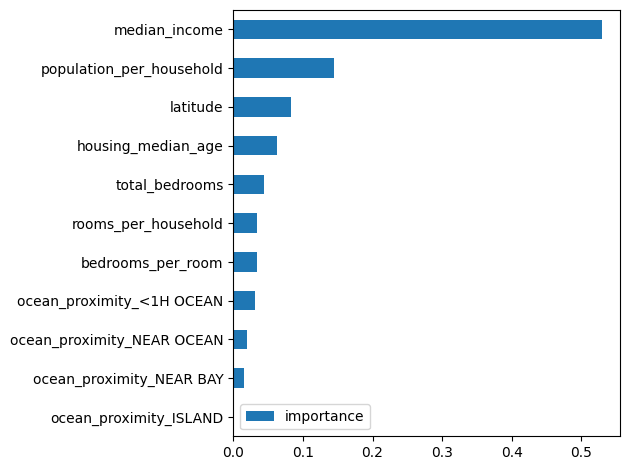

In [50]:
# Understanding the Feature Importance
%matplotlib inline
imp = pd.DataFrame({'importance': Random_Forest['randomforest'].feature_importances_})
imp.index = train_X.columns
imp.sort_values('importance',inplace=True)
imp.plot(kind='barh')

'condition','model_family','days_since_last_purchase','first_time_customer','sales_person', are considered to be important and in grid search

##### Pipeline build based on new importance features

In [51]:
# let's find features for some decent defaults
imp_features = ['latitude',
 'rooms_per_household',
 'ocean_proximity_NEAR OCEAN',
 'bedrooms_per_room',
 'ocean_proximity_ISLAND',
 'ocean_proximity_NEAR BAY',
 'population_per_household',
 'ocean_proximity_<1H OCEAN',
 'median_income',
 'housing_median_age',
 'total_bedrooms']

estimator = RandomForestRegressor()
xgb_training_pipe2 = Pipeline([
    ('randomforest_imp_features', RandomForestRegressor())
])

#### Grid Search of the Estimator

In [52]:
parameters = app_config["RandomForest"]["parameters"]

In [53]:
parameters

{'n_estimators': [50, 100, 200],
 'max_depth': ['None', 10, 20],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [54]:
%%time
est = RandomForestRegressor()
RF_grid = GridSearchCV(est,
                        parameters,
                        cv = 2,
                        n_jobs = 4,
                        verbose=True)

RF_grid.fit(train_X, train_y)

print(RF_grid.best_score_)
print(RF_grid.best_params_)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sathwika/miniconda3/envs/templates_demo-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/sathwika/minicon

0.7632379961208807
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
CPU times: user 1min 10s, sys: 4.02 s, total: 1min 14s
Wall time: 14min 54s


#### Pipeline Build using the best estimator

In [55]:
rf_pipeline_final = Pipeline([('RandomForest_BEST', RF_grid.best_estimator_)
])
rf_pipeline_final.fit(train_X, train_y)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Pipeline(steps=[('RandomForest_BEST',
                 RandomForestRegressor(max_depth=20, min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=200))])

In [56]:
reg_tree_report = RegressionReport(model=rf_pipeline_final, x_train=train_X, y_train=train_y, x_test= test_X, y_test= test_y)
reg_tree_report.get_report(include_shap=False, file_path='regression_tree_model_report')

The Regression report containing the feature importances are available [here](https://drive.google.com/file/d/1JBfL3uxPcxBfl0amweXBFmLr7CSHFBUO/view?usp=sharing)

### Decision Tree

In [57]:
# let's find features for some decent defaults
dt_estimator = DecisionTreeRegressor()
dt_training_pipe_init = Pipeline([
    ('DecisionTree', DecisionTreeRegressor())
])
dt_training_pipe_init.fit(train_X, train_y)

Pipeline(steps=[('DecisionTree', DecisionTreeRegressor())])

In [58]:
reg_linear_report = RegressionReport(model=dt_training_pipe_init, x_train=train_X, y_train=train_y, x_test= test_X, y_test= test_y, refit=True)
reg_linear_report.get_report(include_shap=False, file_path='regression_decisiontree_model_report')

divide by zero encountered in true_divide
invalid value encountered in multiply
invalid value encountered in true_divide


# 5 Model Comparison

Now, a comparison report of the  linear (vs) tree -based model  approach can be generated as follows.

This code will not be part of the production code.

In [59]:
model_pipelines = [reg_ppln,dt_training_pipe_init,Random_Forest,rf_pipeline_final]
model_comparison_report = RegressionComparison(models=model_pipelines,x=train_X, y=train_y,refit=True)
#metrics = model_comparison_report.get_report(file_path='regression_comparison')

In [60]:
model_comparison_report.feature_importances()

{'Linear Regression': :Bars   [index]   (importance),
 'DecisionTree': :Bars   [index]   (importance),
 'randomforest': :Bars   [index]   (importance),
 'RandomForest_BEST': :Bars   [index]   (importance)}

In [62]:
model_comparison_report.perf_metrics()


A report comparing the performance, metrics between Linear model and Tree model are available [here](https://drive.google.com/file/d/1LDibiFap9K4DKME-Y0S0mtI_05lTdaJF/view?usp=sharing)

**Dev NOTES**
<details>

the above metrics are absolute nos and not %ges

In this example we are choosing LM model for pipelining. General criteria for choosing production models is:

- Parametric models (aka whitebox models) such as Linear Regression are easier to explain to non-technical audience.
- Generally these are accepted fast and adoption is quicker.
- If the downstream calls for optimization using these models parametric models are easier to implement.
- When accuracy is primary goal without explainability, the above two takes a backseat